In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

## Oppgave 1


#### 1 a)

For å representeree en polymer av en gitt lengde numerisk er det mulig å lagre hele gitteret, inkludert alle null-elementene, som en matrise, hvor sidelengdene er større enn polymeren. Dette er derimot ikke hensiktsmessig ettersom majoriteten av informasjonen lagret er overflødig. For å forenkle dette kan istedet kun selve posisjonen av hver monomer lagres. Polymeren representeres i et 2D kartesisk kordinatsystem, og dermed kan hver monomer posisjon beskrives av en tuppel med kordinatene x og y. Slik kan hele polymeren være representert av en N x 2 matrise.   

#### 1 b)

In [3]:
def polymer(N: int) -> list[int]:
    """
    Function that returns a list of integers representing the polymer with each element being a touple with the x and y coordinates of the monomer
    :param N: int
    :return: list[int]
    """
    return [(0, i) for i in range(-N//2, N//2)]

#### 1 c)

#### 1 d)

In [4]:
# Method to display the polymer
def display_polymer(polymer_list: list[int]) -> None:
    """
    Function that displays the polymer in a grid
    :param polymer_list: list[int]
    :return: None
    """
    # Adjust grid boundaries to include all monomers
    grid_size = 2 * len(polymer_list) + 1
    offset = len(polymer_list)
    x = np.linspace(-offset, offset, grid_size)
    X, Y = np.meshgrid(x, x)
    
    Z = np.zeros(X.shape)

    # Calculate intensity values for each monomer (stronger towards the end)
    for i, (x, y) in enumerate(polymer_list):
        intensity = i / (len(polymer_list) - 1) + 0.05
        Z[x + offset, y + offset] = intensity

    # Define a purple colormap
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "purple"])

    plt.pcolormesh(X, Y, Z, cmap=cmap)
    plt.show()

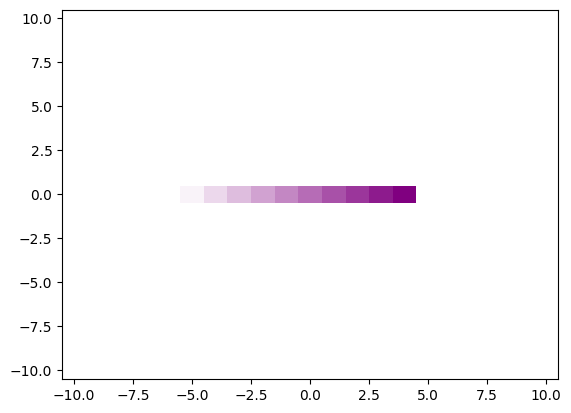

In [5]:
# Test the new Polymer function and display function
polymer_list = polymer(10)

display_polymer(polymer_list)


#### 1 f)

In [6]:
def is_intact_polymer(polymer_object: list[int], N: int) -> bool:
    """
    Function that checks if the polymer is intact
    :param polymer_object: list[int]
    :param N: int
    :return: bool
    """

    # Check if the polymer is the right length
    if len(polymer_object) != N:
        return False

    # Go through each monomer and check if it has a neighbor
    for i in range(N):
        # Hvis det ikke er den første monomeren, sjekk forrige nabo
        if i > 0 and not (abs(polymer_object[i][0] - polymer_object[i-1][0]) == 1 and polymer_object[i][1] == polymer_object[i-1][1]) and not (polymer_object[i][0] == polymer_object[i-1][0] and abs(polymer_object[i][1] - polymer_object[i-1][1]) == 1):
            return False
        
        # If it is not the last monomer, check next neighbor
        if i < N - 1 and not (abs(polymer_object[i][0] - polymer_object[i+1][0]) == 1 and polymer_object[i][1] == polymer_object[i+1][1]) and not (polymer_object[i][0] == polymer_object[i+1][0] and abs(polymer_object[i][1] - polymer_object[i+1][1]) == 1):
            return False
    return True

#### 1f)

In [32]:
def rotate_polymer(polymer_object: list[int], xy_val: tuple[int, int], counter_clockwise: bool) -> list[int]:
    """
    Function that rotates the polymer around a point with 90 degrees
    :param polymer_object: list[int]
    :param xy_val: tuple[int, int]
    :param counter_clockwise: bool
    :return: list[int]
    """
    indx = polymer_object.index(xy_val)

    # The x and y coordinates of the monomer and the previous monomer are the same
    # Rotate the front from the monomer at the xy_val

    if counter_clockwise:
        not_rotating = polymer_object[indx+1:]
        rotating = polymer_object[:indx+1]


In [33]:
#return [(x - xy_val[0], y - xy_val[1]) for x, y in polymer_object[]]

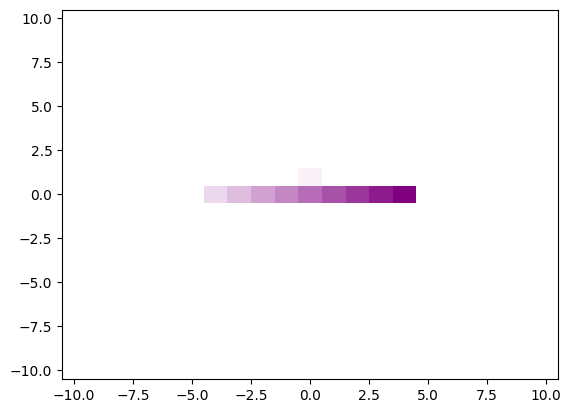

In [34]:
# testing
polymer_list = polymer(10)
polymer_list = rotate_polymer(polymer_list, (0, 0), True)
display_polymer(polymer_list)

## Oppgave 2